# The Sparks Foundation - Data Science and Business Analytics Intern

# Task 2 - Prediction using Unsupervised ML

Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.


From the given 'Iris' dataset predict the optimum numbmer of clusters and represent it visually.
This can be sloved using K-means clustering.

# Clustering :

Clustering is a method of grouping the objects into clusters such that objects with most similarities remains into a group and has less or no similarities with the objects of another group. Cluster analysis finds the commonalities between the data objects and categorizes them as per the presence and absence of those commonalities.

In [1]:
# Importing required Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
#Loading Iris dataset
#Reading the dataset from source
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(5) #printing head of the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info() #getting data information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe() #describing the data.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding the number of clusters for K- means classification.

In [5]:
# Determining the value of K.

x=iris_df.iloc[:,[0,1,2,3]].values #arranging data.
# creating several cluster combinations and observeing wcss (within clustter sum of squares)
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300 ,n_init = 10,random_state=0)
    Kmeans.fit(x) # fitting the model on prepared data.
    wcss.append(Kmeans.inertia_)
wcss # returns wcss for specific value of k.

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

# Plotting the result onto a graph and to observe 'The elbow'.

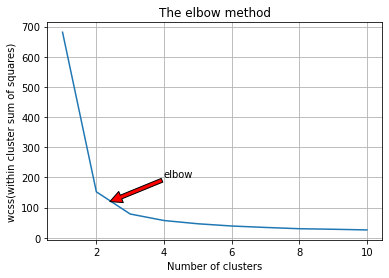

In [6]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method') # setting plot title and axis lables.
plt.xlabel('Number of clusters')
plt.ylabel('wcss(within cluster sum of squares)')
plt.annotate("elbow",xytext=(4,200),xy=(2.4,120),arrowprops={"facecolor":"red"})
plt.grid()
plt.show() #display graph

The plot with Number of clusters on x-axis and wcss(within cluster sum of squares) on y-axis.

The optimal clusters are formed where the elbow occurs.This is when the wcss(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.The Elbow method shows optimum value for K is 3.

# Creating K-Means Classifier.

Here we are choosing the number of clusters as 3.

In [7]:
Kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300 ,n_init = 10,random_state=0)
y_kmeans=Kmeans.fit_predict(x)
#y_kmeans

# Visualizing the Cluster data.

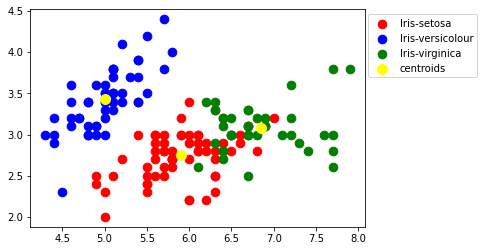

In [8]:
#Visualizing the Cluster for the first 2 columns of data.
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=75,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=75,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=75,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters.
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":10})
plt.show()

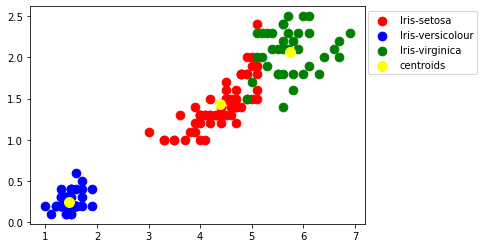

In [9]:
#Visualizing the Cluster for the last 2 columns of data.
plt.scatter(x[y_kmeans == 0,2],x[y_kmeans == 0,3],s=75,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,2],x[y_kmeans == 1,3],s=75,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,2],x[y_kmeans == 2,3],s=75,c='green',label='Iris-virginica')

# Plotting the centroids of the clusters.
plt.scatter(Kmeans.cluster_centers_[:,2],Kmeans.cluster_centers_[:,3],s=100,c='yellow',label='centroids')
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":10})
plt.show()